In [3]:
# Import necessary libraries for data processing and modeling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load and inspect the dataset
dataframe = pd.read_csv('/Users/sarps/Downloads/creditcard_2023.csv')
print(dataframe.head())
print(dataframe.info())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [5]:
# Check for missing data
missing_values = dataframe.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Prepare feature set and labels
features = dataframe.drop(columns=['id', 'Class'], errors='ignore')
labels = dataframe['Class']
print("Feature columns:\n", features.columns.tolist())


Feature columns:
 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (454904, 29)
Test set shape: (113726, 29)


In [8]:
# Normalize the feature set
normalizer = StandardScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [ ]:
# Display class distribution
class_distribution = pd.Series(y_train).value_counts(normalize=True)
print("Class distribution in training set:\n", class_distribution)

Class distribution in training set:
 Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


In [10]:
# Initialize Random Forest model with chosen parameters
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)


In [12]:
# Perform cross-validation
cv_f1_scores = cross_val_score(random_forest_model, X_train_normalized, y_train, cv=5, scoring='f1')
print("\nCross-validation F1 scores:", cv_f1_scores)
print("Average F1 score:", np.mean(cv_f1_scores))



Cross-validation F1 scores: [0.98470321 0.98650077 0.98473333 0.98425733 0.9838382 ]
Average F1 score: 0.9848065691355863


In [13]:
# Train the model on the training data
random_forest_model.fit(X_train_normalized, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [14]:
# Make predictions on the test data
predictions = random_forest_model.predict(X_test_normalized)


In [15]:
# Evaluate the model with a classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



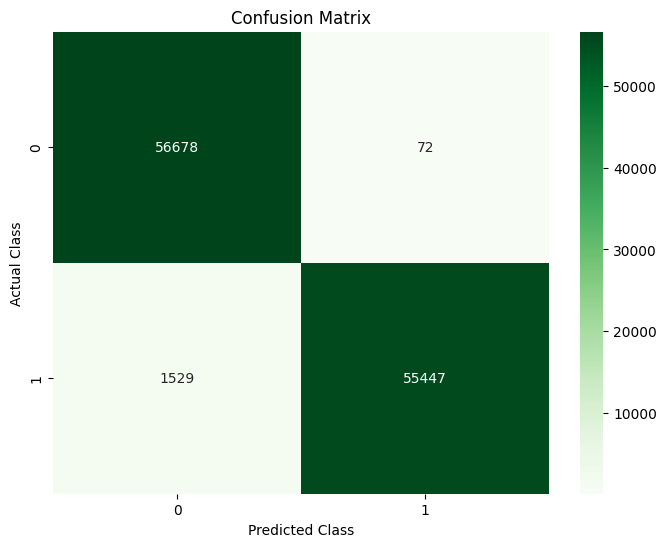

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()


In [23]:
# Determine feature importance
feature_importances = random_forest_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df.head())

Feature Importances:
    Feature  Importance
9      V10    0.171752
3       V4    0.159210
13     V14    0.145847
11     V12    0.114395
10     V11    0.089934


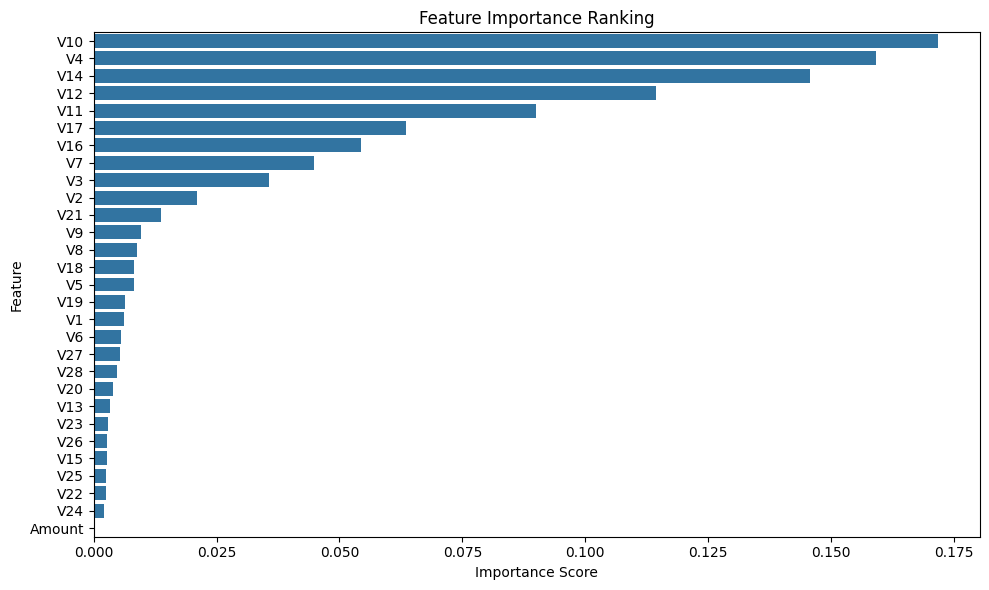

In [24]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

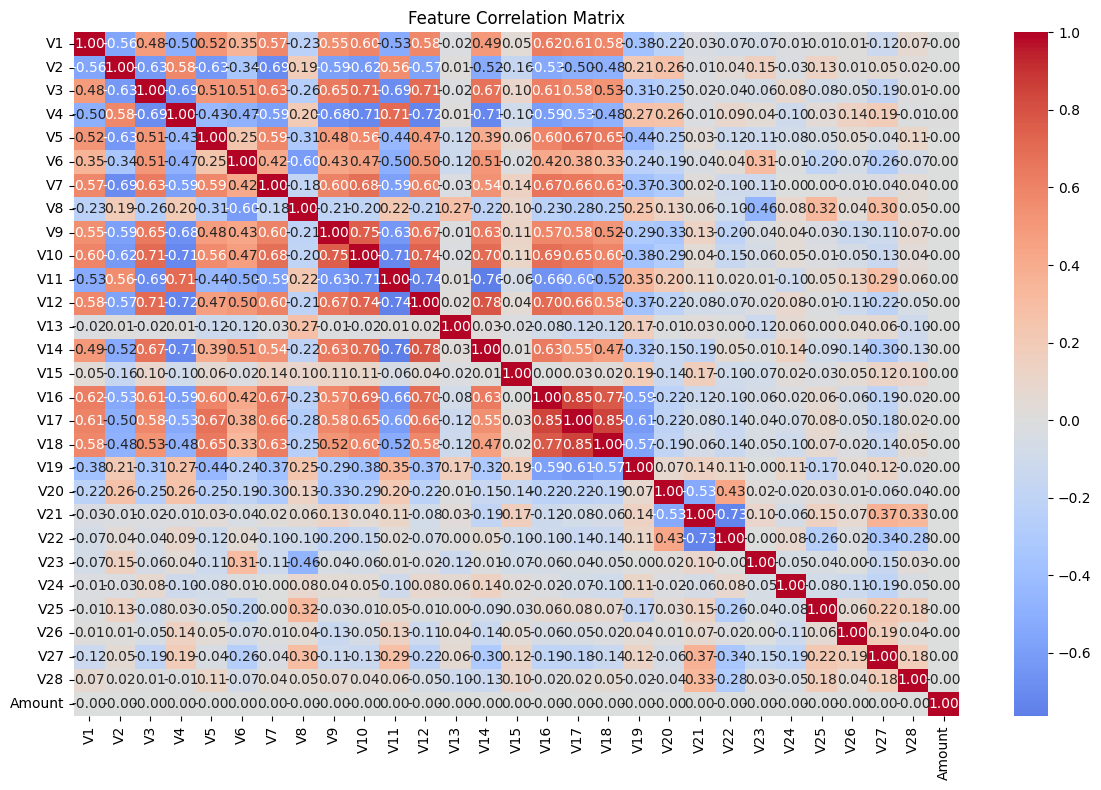

In [25]:
# Compute and plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

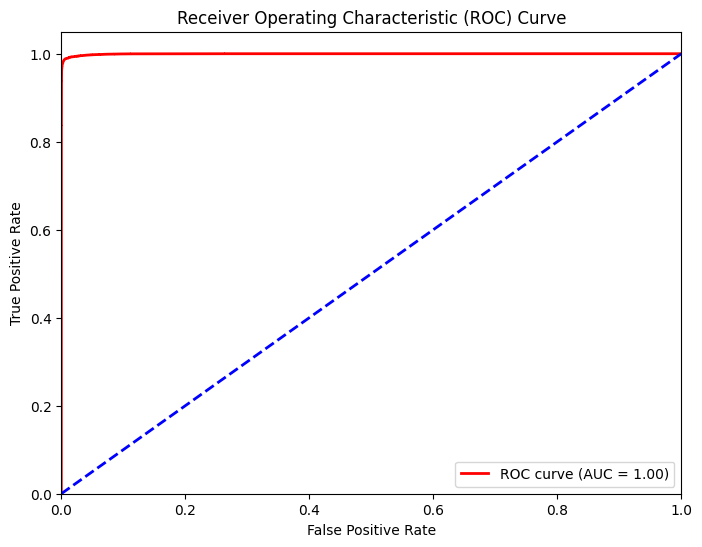

In [30]:
# Calculate and plot the ROC curve
proba_predictions = random_forest_model.predict_proba(X_test_normalized)[:, 1]
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, proba_predictions)
roc_auc_value = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()